In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd

from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

# A.Using only RGB features

In [4]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
labels = np.load("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/labeldata.npy")

In [ ]:
X=df
Y=labels
rs=42
X

,red_val,green_val,blue_val
0,61.841728,83.685791,30.381555
1,58.776155,80.259737,28.989622
2,57.559864,79.052525,28.126113
3,58.090181,78.781991,31.884950
4,57.787745,78.502028,30.747365
...,...,...,...
771,82.194736,102.484696,31.684638
772,81.049292,101.100902,31.487134
773,80.883341,101.111931,29.385463
774,80.806641,100.844573,29.671693


0.90 accuracy with a standard deviation of 0.12


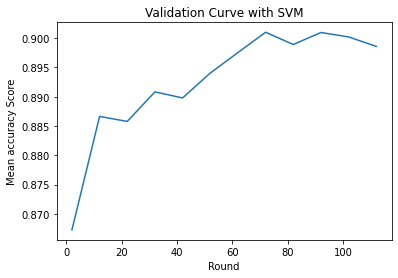

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)


### Model reaches 90% accuracy in 70th fold of cross validation

# B. Using the Metadata with RGB

In [7]:
metadata=pd.read_csv('drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/metadata.csv')

## B-1 Brightness Only as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['brightness']=metadata['brightness']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,brightness
0,61.841728,83.685791,30.381555,4.97
1,58.776155,80.259737,28.989622,4.97
2,57.559864,79.052525,28.126113,4.97
3,58.090181,78.781991,31.884950,4.97
4,57.787745,78.502028,30.747365,4.97
...,...,...,...,...
771,82.194736,102.484696,31.684638,5.17
772,81.049292,101.100902,31.487134,5.19
773,80.883341,101.111931,29.385463,5.13
774,80.806641,100.844573,29.671693,5.13


0.93 accuracy with a standard deviation of 0.10


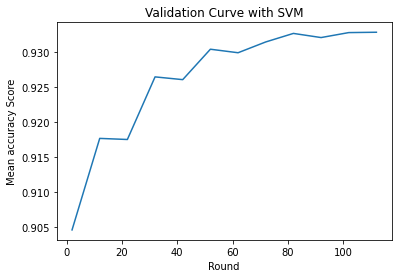

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)


### Reaches 94% accuracy at 100th round

## B-2 Using Shutter speed alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['shutter_speed']=metadata['shutter_speed']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,shutter_speed
0,61.841728,83.685791,30.381555,9.024
1,58.776155,80.259737,28.989622,9.024
2,57.559864,79.052525,28.126113,9.024
3,58.090181,78.781991,31.884950,9.024
4,57.787745,78.502028,30.747365,9.024
...,...,...,...,...
771,82.194736,102.484696,31.684638,9.193
772,81.049292,101.100902,31.487134,9.240
773,80.883341,101.111931,29.385463,9.193
774,80.806641,100.844573,29.671693,9.193


0.95 accuracy with a standard deviation of 0.09


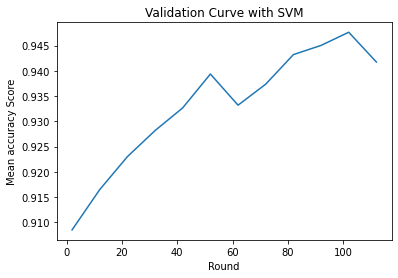

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy converges near 95% at 100th round

## B-3 Using Exposure time alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['exposure_time']=metadata['exposure_time']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,exposure_time
0,61.841728,83.685791,30.381555,0.001919
1,58.776155,80.259737,28.989622,0.001919
2,57.559864,79.052525,28.126113,0.001919
3,58.090181,78.781991,31.884950,0.001919
4,57.787745,78.502028,30.747365,0.001919
...,...,...,...,...
771,82.194736,102.484696,31.684638,0.001709
772,81.049292,101.100902,31.487134,0.001653
773,80.883341,101.111931,29.385463,0.001709
774,80.806641,100.844573,29.671693,0.001709


0.94 accuracy with a standard deviation of 0.10


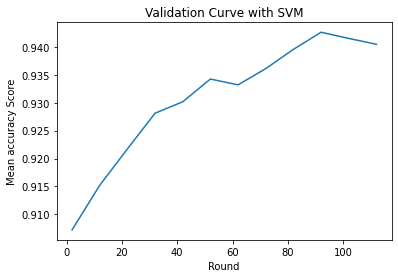

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy converges around 94%

## B-4 Using ISO alone as metadata

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['iso']=metadata['iso']
X=df[0:]
Y=labels
rs=42
X

,red_val,green_val,blue_val,iso
0,61.841728,83.685791,30.381555,125.0
1,58.776155,80.259737,28.989622,125.0
2,57.559864,79.052525,28.126113,125.0
3,58.090181,78.781991,31.884950,125.0
4,57.787745,78.502028,30.747365,125.0
...,...,...,...,...
771,82.194736,102.484696,31.684638,100.0
772,81.049292,101.100902,31.487134,125.0
773,80.883341,101.111931,29.385463,100.0
774,80.806641,100.844573,29.671693,100.0


0.90 accuracy with a standard deviation of 0.12


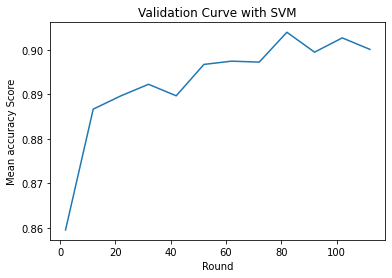

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy reaches maximum for the initial accuracy of RGB, or lesser.

# With RGB and Metadata excluding ISO

In [ ]:
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['brightness']=metadata['brightness']
df['shutter_speed']=metadata['shutter_speed']
df['exposure_time']=metadata['exposure_time']
df

,red_val,green_val,blue_val,brightness,shutter_speed,exposure_time
0,61.841728,83.685791,30.381555,4.97,9.024,0.001919
1,58.776155,80.259737,28.989622,4.97,9.024,0.001919
2,57.559864,79.052525,28.126113,4.97,9.024,0.001919
3,58.090181,78.781991,31.884950,4.97,9.024,0.001919
4,57.787745,78.502028,30.747365,4.97,9.024,0.001919
...,...,...,...,...,...,...
771,82.194736,102.484696,31.684638,5.17,9.193,0.001709
772,81.049292,101.100902,31.487134,5.19,9.240,0.001653
773,80.883341,101.111931,29.385463,5.13,9.193,0.001709
774,80.806641,100.844573,29.671693,5.13,9.193,0.001709


In [ ]:
X=df[0:]
Y=labels
X

,red_val,green_val,blue_val,brightness,shutter_speed,exposure_time
0,61.841728,83.685791,30.381555,4.97,9.024,0.001919
1,58.776155,80.259737,28.989622,4.97,9.024,0.001919
2,57.559864,79.052525,28.126113,4.97,9.024,0.001919
3,58.090181,78.781991,31.884950,4.97,9.024,0.001919
4,57.787745,78.502028,30.747365,4.97,9.024,0.001919
...,...,...,...,...,...,...
771,82.194736,102.484696,31.684638,5.17,9.193,0.001709
772,81.049292,101.100902,31.487134,5.19,9.240,0.001653
773,80.883341,101.111931,29.385463,5.13,9.193,0.001709
774,80.806641,100.844573,29.671693,5.13,9.193,0.001709


In [ ]:
rs=42

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto',random_state=rs))

scores = cross_val_score(clf, X, Y, cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]


0.95 accuracy with a standard deviation of 0.09


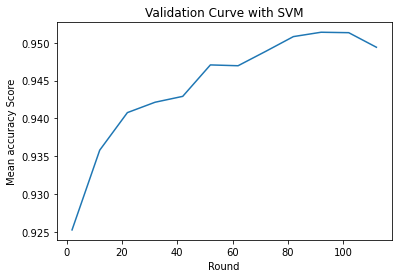

In [ ]:
plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)

### Accuracy reaches 95% for cross validation rounds count exceeding 100

# Decision Tree

Max Accuracy :  0.9573170731707317
Standard Deviation :  0.06165609451100238


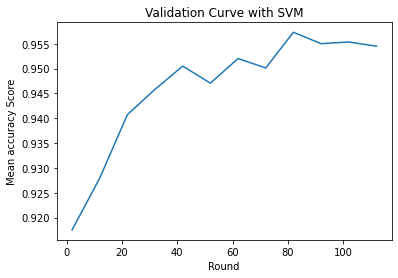

In [32]:
rs=42
df=pd.read_csv("drive/My Drive/Final Year Research/Dataset/Oneplus 5T/data_files/rgbarray.csv")
df['brightness']=metadata['brightness']
df['shutter_speed']=metadata['shutter_speed']
df['exposure_time']=metadata['exposure_time']
X=df
Y=labels
from sklearn import tree
clf = make_pipeline(StandardScaler(), tree.DecisionTreeClassifier(random_state=rs))
#clf = tree.DecisionTreeClassifier()

#scores = cross_val_score(clf, X, Y, cv=80)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

means=[cross_val_score(clf, X, Y, cv=i).mean() for i in range(2,120,10)]
stds=[cross_val_score(clf, X, Y, cv=i).std() for i in range(2,120,10)]
i=1
max=means[0]
ind=0
while i<len(means):
  if(max<means[i]):
    max=means[i]
    ind=i
  i+=1

print("Max Accuracy : ",means[ind])
print("Standard Deviation : ",stds[ind])

plt.title("Validation Curve with SVM")
plt.xlabel("Round")
plt.ylabel("Mean accuracy Score")
plt.plot(np.arange(2,120,10,dtype=int),means)